In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries
The following imports the required libraries:

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

### Importing the Dataset
The dataset that can be downloaded from this Kaggle link.
If you download the dataset and extract the compressed file, you will see a CSV file. The file contains 50,000 records and two columns: review and sentiment. The review column contains text for the review and the sentiment column contains sentiment for the review. The sentiment column can have two values i.e. "positive" and "negative" which makes our problem a binary classification problem.

In [4]:
#Importing the datset
movie_reviews = pd.read_csv("/content/drive/My Drive/AI_Project/NLP/Settlement-Analysis-for-Movie-Reviews/IMDB Dataset.csv")

In [5]:
#print the first 5 rows of the dataset using the head() method.
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
#The print result contains punctuations, brackets and a few HTML tags.
movie_reviews['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

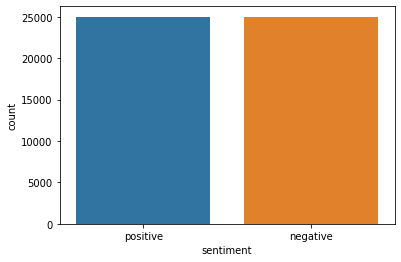

In [7]:
#The Positive and Negative sentiment distribution in the dataset
#The output shows the dataset contains equal number of positive and negative revies
import seaborn as sns
sns.countplot(x='sentiment', data = movie_reviews)

In [11]:
#Data Preprocessing
#we define a function that takes a text string as a parameter and the performs
#preprocessing on the string to remove special character and HTML tags from the string
def preprocess_text(sen):
    #Removing html tags
    sentence = remove_tags(sen)

    #Remove punctuations and numbers [\s\S]*?
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    #Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    #Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence


In [12]:
#Remove tag function
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [13]:
#Preprocess reviews and store them in a new list
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [14]:
#let's print the fourth review
# From the output, HTML tags, punctuations and numbers have been removed
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [15]:
#Lets convert our labels into digits. We have two labels in the output 
# "Positive" and "Negative"
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=='positive' else 0, y)))

In [17]:
#let's see the result
print(y)

[1 1 1 ... 0 0 0]
